In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes import param
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
plt.style.use(Cstyle.style1)

In [2]:
sim = param.pflrw_d3e2_L1821_t1_N128_LCDM()
f = pd.read_table('/home/robynm/simulations/'+sim.sim_name+'/h5_data.csv', delimiter=',')
Lin = LinData.LinData_Class(sim, '/home/robynm/simulations/'+sim.sim_name+'/')

sim32 = param.pflrw_d3e2_L1821_t1_N32_LCDM()
Lin32 = LinData.LinData_Class(sim32, '/home/robynm/simulations/'+sim32.sim_name+'/')
f32 = pd.read_table('/home/robynm/simulations/'+sim32.sim_name+'/h5_data.csv', delimiter=',')

sim64 = param.pflrw_d3e2_L1821_t1_N64_LCDM()
Lin64 = LinData.LinData_Class(sim64, '/home/robynm/simulations/'+sim64.sim_name+'/')
f64 = pd.read_table('/home/robynm/simulations/'+sim64.sim_name+'/h5_data.csv', delimiter=',')

 read time file
 read time file
 read time file


In [3]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = RRead.safe_division(abs(f32-f64), abs(f64-f128))
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

In [7]:
t = np.array(f['t'])
an = Lin.an_initial(t)
a = Lin.a(t)
H = Lin.Hprop(t)
H0 = Lin.Hprop_today

R3av = np.array(f['RicciS_av'])
R3OD = np.array(f['RicciS_OD'])
R3UD = np.array(f['RicciS_UD'])

In [8]:
err = get_error(np.array(f32['RicciS_av']), np.array(f64['RicciS_av']), R3av)
errOD = get_error(np.array(f32['RicciS_OD']), np.array(f64['RicciS_OD']), R3OD)
errUD = get_error(np.array(f32['RicciS_UD']), np.array(f64['RicciS_UD']), R3UD)

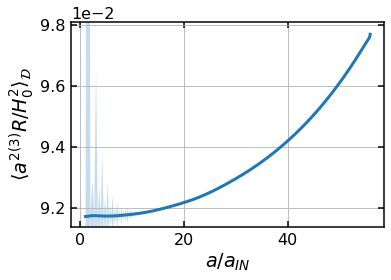

In [8]:
plt.plot(an, (a**2)*R3av/(H0**2))
plt.fill_between(an, (a**2)*(R3av-err)/(H0**2), (a**2)*(R3av+err)/(H0**2), alpha=0.25)
plt.grid()
plt.ylim(0.0914, 0.0981)
plt.xlabel(r'$a/a_{IN}$')
plt.ylabel(r'$\langle a^2 {}^{(3)}R/H_{0}^2\rangle_{\mathcal{D}}$')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('/home/robynm/simulations/'+sim.sim_name+'/plots/average_3R_withH0.pdf')

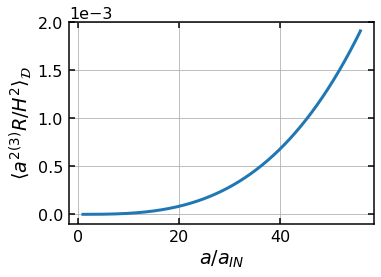

In [9]:
plt.plot(an, (a**2)*R3av/(H**2))
plt.fill_between(an, (a**2)*(R3av-err)/(H**2), (a**2)*(R3av+err)/(H**2), alpha=0.25)
plt.grid()
#plt.ylim(0.0914, 0.0981)
plt.xlabel(r'$a/a_{IN}$')
plt.ylabel(r'$\langle a^2 {}^{(3)}R/H^2\rangle_{\mathcal{D}}$')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('/home/robynm/simulations/'+sim.sim_name+'/plots/average_3R_withH.pdf')

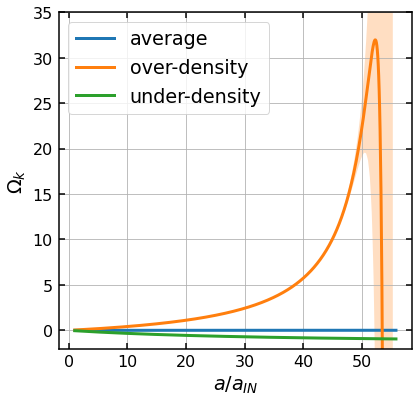

In [40]:
plt.figure(figsize=(6.5,6))
plt.plot(an, R3av/(9*(H**2)), label='average')
plt.fill_between(an, (R3av-err)/(9*(H**2)), (R3av+err)/(9*(H**2)), alpha=0.25)
plt.plot(an, R3OD/(9*(H**2)), label='over-density')
plt.fill_between(an, (R3OD-errOD)/(9*(H**2)), (R3OD+errOD)/(9*(H**2)), alpha=0.25)
plt.plot(an, R3UD/(9*(H**2)), label='under-density')
plt.fill_between(an, (R3UD-errUD)/(9*(H**2)), (R3UD+errUD)/(9*(H**2)), alpha=0.25)
plt.grid()
plt.xlabel(r'$a/a_{IN}$')
plt.ylabel(r'$\Omega_k$')
#plt.ylabel(r'$\langle\Omega_k\rangle_{\mathcal{D}}$')
plt.tight_layout()
plt.ylim(-2, 35)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.savefig('/home/robynm/simulations/'+sim.sim_name+'/plots/OmegaK_avODUD.pdf')

In [42]:
Lin.z(t)[-1]

4.432578849983363